# Sample Template

Here is some sample text, and a first block of code

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
df = pd.read_csv('SP.csv', sep=';')
df

,Unnamed: 0.1,Unnamed: 0,Date,Return,pct,Cum
0,0,0,1950-01-04,0.000000,0.000000,0.000000
1,1,1,1950-01-05,0.004737,0.473654,0.004737
2,2,2,1950-01-06,0.002949,0.294898,0.007686
3,3,3,1950-01-09,0.005872,0.587201,0.013558
4,4,4,1950-01-10,-0.002932,-0.293163,0.010626
...,...,...,...,...,...,...
18444,18444,18444,2023-04-24,0.000851,0.085122,5.503385
18445,18445,18445,2023-04-25,-0.015937,-1.593718,5.487448
18446,18446,18446,2023-04-26,-0.003849,-0.384858,5.483599
18447,18447,18447,2023-04-27,0.019377,1.937719,5.502977


In [16]:
def hamilton_filter(x, transition_matrix, initial_state_probs, initial_params):
    n = len(x)
    num_states = len(initial_state_probs)

    # Parameters for each state
    mu = initial_params['mu']
    phi = initial_params['phi']
    sigma = initial_params['sigma']

    # Initialize probabilities and likelihoods
    filtered_probs = np.zeros((n, num_states))
    predicted_probs = np.zeros((n, num_states))
    filtered_probs[0] = initial_state_probs

    for t in range(1, n):
        # Prediction step
        predicted_probs[t] = transition_matrix @ filtered_probs[t-1]

        # Update step
        likelihoods = np.array([norm.pdf(x[t], mu[s] + phi[s] * x[t-1], np.sqrt(sigma[s])) for s in range(num_states)])
        updated_probs = predicted_probs[t] * likelihoods
        filtered_probs[t] = updated_probs / np.sum(updated_probs)

    return filtered_probs, predicted_probs

def backward_smoothing(filtered_probs, predicted_probs, transition_matrix):
    n, num_states = filtered_probs.shape
    smoothed_probs = np.zeros_like(filtered_probs)
    smoothed_probs[-1] = filtered_probs[-1]

    for t in range(n-2, -1, -1):
        smoothing_factor = (transition_matrix * (smoothed_probs[t+1] / predicted_probs[t+1])).sum(axis=1)
        smoothed_probs[t] = filtered_probs[t] * smoothing_factor
        smoothed_probs[t] /= np.sum(smoothed_probs[t])  # normalize

    return smoothed_probs

## A second heading

and some more text

In [17]:

# Example usage
x = np.array([df['Return']])  # Replace with your data
transition_matrix = np.array([[0.9, 0.1], [0.1, 0.9]])  # Example transition probabilities
initial_state_probs = np.array([0.5, 0.5])  # Initial state probabilities
initial_params = {'mu': [0, 1], 'phi': [0.5, 0.5], 'sigma': [1, 2]}  # Initial parameter guesses

filtered_probs, predicted_probs = hamilton_filter(x, transition_matrix, initial_state_probs, initial_params)
smoothed_probs = backward_smoothing(filtered_probs, predicted_probs, transition_matrix)

# Output the filtered probabilities
print(filtered_probs)

# Output the smoothed probabilities
print(smoothed_probs)

[[0.5 0.5]]
[[0.5 0.5]]


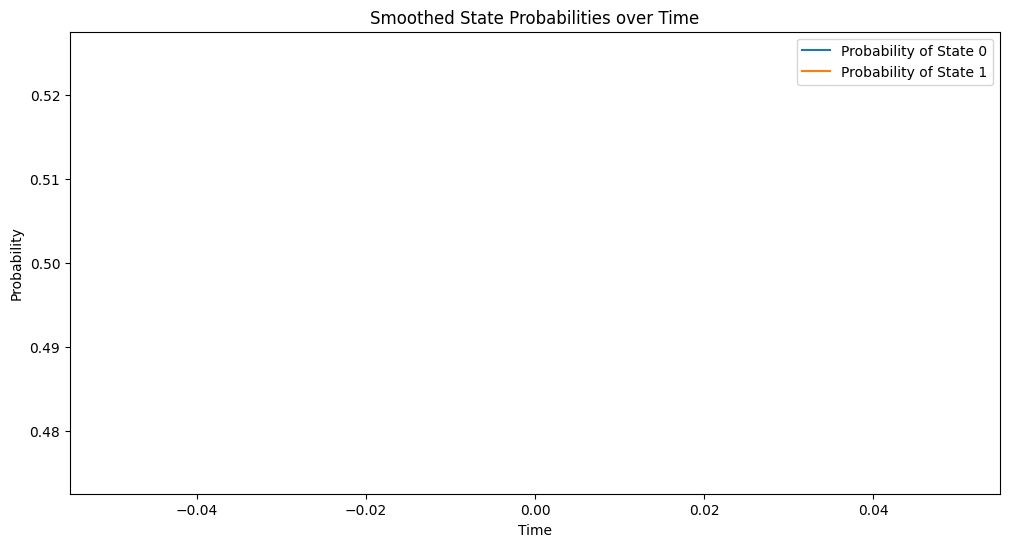

In [15]:
# Plotting the smoothed probabilities
plt.figure(figsize=(12, 6))
plt.plot(smoothed_probs[:, 0], label='Probability of State 0')
plt.plot(smoothed_probs[:, 1], label='Probability of State 1')
plt.title('Smoothed State Probabilities over Time')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.legend()
plt.show()